https://sbartek.github.io/sparkRInstall/installSparkReasyWay.html

In [1]:
spark_path <- '/home/clint/Downloads/spark-2.4.0-bin-hadoop2.7'
#if (nchar(Sys.getenv("SPARK_HOME")) < 1) {
  Sys.setenv(SPARK_HOME = spark_path)
#}
library(SparkR, lib.loc = c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib")))
sparkR.session(master = "local[*]", sparkConfig = list(spark.driver.memory = "2g"))


Attaching package: ‘SparkR’

The following objects are masked from ‘package:stats’:

    cov, filter, lag, na.omit, predict, sd, var, window

The following objects are masked from ‘package:base’:

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union

Spark package found in SPARK_HOME: /home/clint/Downloads/spark-2.4.0-bin-hadoop2.7


Launching java with spark-submit command /home/clint/Downloads/spark-2.4.0-bin-hadoop2.7/bin/spark-submit   --driver-memory "2g" sparkr-shell /tmp/RtmpmiWfNB/backend_port50927ac2b158 


Java ref type org.apache.spark.sql.SparkSession id 1 

In [2]:
library(sparklyr)
spark_available_versions()

spark
1.6.3
1.6.2
1.6.1
1.6.0
2.0.0
2.0.1
2.0.2
2.1.0
2.1.1
2.2.0


In [3]:
spark_install(version = "2.4.0")

# sparkR in sparklyr

In [4]:
library(sparklyr)
sc <- spark_connect(master = "local")

# 3. Sample Dataset 
To simplify the learning process, let us use a very familiar dataset: the iris dataset. It is part of the dplyr library and let's load that library to use the iris data frame. Here the iris dataset is still in the local node where the R notebook is running on. And we can see that the first a few lines of the iris dataset below the code after running:

In [5]:
library(dplyr)
head(iris)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:SparkR’:

    arrange, between, coalesce, collect, contains, count, cume_dist,
    dense_rank, desc, distinct, explain, expr, filter, first, group_by,
    intersect, lag, last, lead, mutate, n, n_distinct, ntile,
    percent_rank, rename, row_number, sample_frac, select, slice, sql,
    summarize, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


# 4. IMPORTANT - Copy Data to Spark Environment
In real applications, your data is usually very big and cannot fit into one hard disk and it is very likely your data is already in Hadoop/Spark ecosystem. You can use SparkDataFrame to analyze your data in Spark system directly. Here, we illustrate how to copy a local dataset to Spark environment and then work on that dataset in the Spark system. As we have already created the Spark Connection sc, it is fairly simple to copy data to spark system by sdf_copy_to() function as below:

In [6]:
iris_tbl <- sdf_copy_to(sc = sc, x = iris, overwrite = T)

The above one line code copies iris dataset from local node to Spark cluster environment where sc is the Spark Connection we just created; x is the data frame that we want to copy; and overwrite is the option whether we want to overwrite the target object if the same name SparkDataFrame exists in the Spark environment. Finally sdf_copy_to() function will return an R object wrapping the copied SparkDataFrame. So irir_tbl can be used to refer to the iris SparkDataFrame.

To check whether the iris dataset was copied to Spark environment successfully or not, we can use src_tbls( ) function to the Spark Connection (sc):

In [7]:
src_tbls(sc)

[1] "iris"

# 5. Analyzing the Data
Now we have successfully copied the iris dataset to the Spark environment as a SparkDataFrame. And iris_tbl is an R object wrapping the iris SparkDataFrame and we can use iris_tbl to refer the iris dataset in the Spark system (i.e. the iris SparkDataFrame). With the sparklyr packages, we can use many functions in dplyr to SparkDataFrame directly through iris_tbl, same as we are applying dplyr functions to a local R data frame in our laptop. For example, we can use %>% operator to pass iris_tbl to count( ) function:

In [8]:
iris_tbl %>% count ## basci count for iris_tbl (i.e. iris SparkDataFrame)

# Source: spark<?> [?? x 1]
      n
  <dbl>
1   150

In [9]:
head(iris_tbl) ## check the first a few rows of iris_tbl (i.e. iris SparkDataFrame)

# Source: spark<?> [?? x 5]
  Sepal_Length Sepal_Width Petal_Length Petal_Width Species
         <dbl>       <dbl>        <dbl>       <dbl> <chr>  
1          5.1         3.5          1.4         0.2 setosa 
2          4.9         3            1.4         0.2 setosa 
3          4.7         3.2          1.3         0.2 setosa 
4          4.6         3.1          1.5         0.2 setosa 
5          5           3.6          1.4         0.2 setosa 
6          5.4         3.9          1.7         0.4 setosa 

In [10]:
## more advaced manunipulation
iris_tbl %>% 
  mutate(Sepal_Width = ROUND(Sepal_Width * 2) / 2) %>% # Bucketizing Sepal_Width
  group_by(Species, Sepal_Width) %>% 
  summarize(count = n(), Sepal_Length = mean(Sepal_Length), stdev = sd(Sepal_Length)) 

Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”

# Source: spark<?> [?? x 5]
# Groups: Species
   Species    Sepal_Width count Sepal_Length   stdev
   <chr>            <dbl> <dbl>        <dbl>   <dbl>
 1 setosa             3.5    23         5.07   0.238
 2 versicolor         3.5     2         6.15   0.212
 3 versicolor         2       3         5.73   0.643
 4 versicolor         3      27         6.17   0.468
 5 virginica          4       2         7.8    0.141
 6 setosa             3      16         4.70   0.228
 7 virginica          3.5     6         6.57   0.378
 8 virginica          2       1         6    NaN    
 9 setosa             4       9         5.37   0.265
10 setosa             2.5     1         4.5  NaN    
# … with more rows

# 6. Collect Results Back to Master Node
Even though we can run many of the dplyr functions on SparkDataFrame, we cannot apply functions from other packages to SparkDataFrame direction (such as ggplot()). For functions that can only work on local R data frames, we must copy the SparkDataFrame back to the local node. To copy SparkDataFrame back to the local node, we use the collect() function where the argument to it is the name of the SparkDataFrame. The following code collect() the results of a few operations and assign the collected data to iris_summary variable:

In [11]:
iris_summary <- iris_tbl %>% 
  mutate(Sepal_Width = ROUND(Sepal_Width * 2) / 2) %>% # Bucketizing Sepal_Width
  group_by(Species, Sepal_Width) %>% 
  summarize(count = n(), Sepal_Length = mean(Sepal_Length), stdev = sd(Sepal_Length)) %>% collect

iris_summary

Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”

Species,Sepal_Width,count,Sepal_Length,stdev
setosa,3.5,23,5.069565,0.2382413
versicolor,3.5,2,6.150000,0.2121320
versicolor,2.0,3,5.733333,0.6429101
versicolor,3.0,27,6.174074,0.4678861
virginica,4.0,2,7.800000,0.1414214
setosa,3.0,16,4.700000,0.2280351
virginica,3.5,6,6.566667,0.3777124
virginica,2.0,1,6.000000,NaN
setosa,4.0,9,5.366667,0.2645751
setosa,2.5,1,4.500000,NaN



Attaching package: ‘ggplot2’

The following object is masked from ‘package:SparkR’:

    expr

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

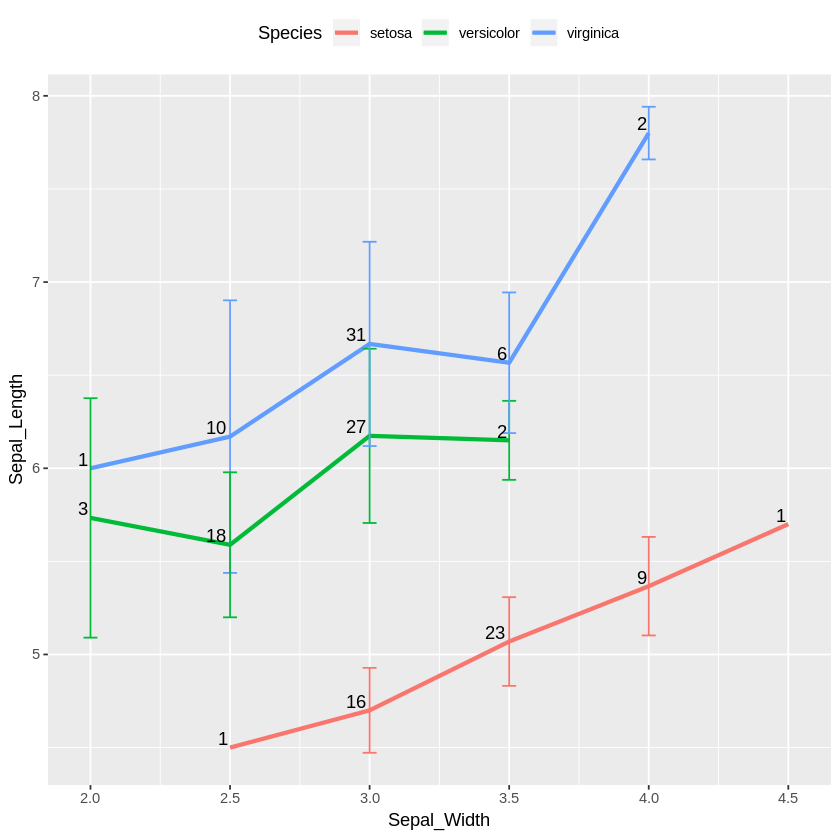

In [12]:
library(ggplot2)
ggplot(iris_summary, aes(Sepal_Width, Sepal_Length, color = Species)) + 
  geom_line(size = 1.2) +
  geom_errorbar(aes(ymin = Sepal_Length - stdev, ymax = Sepal_Length + stdev), width = 0.05) +
  geom_text(aes(label = count), vjust = -0.2, hjust = 1.2, color = "black") +
  theme(legend.position="top")

# 7 Fit Regression to SparkDataFrame
One of the largest advantage is that, within Spark system, there are already many statistical and machine learning algorithms developed to run parallel across many CPUs with data across many memory units. So, we can easily fit a linear regression for big dataset far beyond the memory limit of one single computer. Below is an illustration of how to fit a linear regression to SparkDataFrame using R notebook:

In [13]:
## fit a linear regression model in Spark envrioment:
fit1 <-  ml_linear_regression(x = iris_tbl, response = "Sepal_Length", features = c("Sepal_Width", "Petal_Length", "Petal_Width"))
summary(fit1)

Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-0.82816 -0.21989  0.01875  0.19709  0.84570 

Coefficients:
 (Intercept)  Sepal_Width Petal_Length  Petal_Width 
   1.8559975    0.6508372    0.7091320   -0.5564827 

R-Squared: 0.8586
Root Mean Squared Error: 0.3103


# 8. Fit a K-means Model
Through sparkly package, we can use R notebook to access many Spark Machine Learning Library (MLlib) algorithms such as linear regression, logistic regression, Survival Regression, Generalized Linear Regression, Decision Trees, Random Forests, Gradient-Boosted Trees, Principal Components Analysis, Naive-Bayes, K-Means Clustering and a few other methods. Below codes fit a k-means cluster algorithm:

In [14]:
## Now fit a k-mean clustering using iris_tbl data 
## with only two out of four features in iris_tbl
fit2 <- ml_kmeans(x = iris_tbl, centers = 3, features = c("Petal_Length", "Petal_Width"))

# print our model fit
print(fit2)


Warning message:
“The parameter `centers` is deprecated and will be removed in a future release. Please use `k` instead.”

K-means clustering with 3 clusters

Cluster centers:
  Petal_Length Petal_Width
1     4.292593    1.359259
2     1.462000    0.246000
3     5.626087    2.047826

Within Set Sum of Squared Errors =  31.41289

In [15]:
prediction = collect(sdf_predict(fit2, iris_tbl)) ## here the collect function bring data from cluster to master or local node
head(prediction)

Warning message in sdf_predict.ml_model(fit2, iris_tbl):
“The signature sdf_predict(model, dataset) is deprecated and will be removed in a future version. Use sdf_predict(dataset, model) or ml_predict(model, dataset) instead.”

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,features,prediction
5.1,3.5,1.4,0.2,setosa,"1.4, 0.2",1
4.9,3.0,1.4,0.2,setosa,"1.4, 0.2",1
4.7,3.2,1.3,0.2,setosa,"1.3, 0.2",1
4.6,3.1,1.5,0.2,setosa,"1.5, 0.2",1
5.0,3.6,1.4,0.2,setosa,"1.4, 0.2",1
5.4,3.9,1.7,0.4,setosa,"1.7, 0.4",1


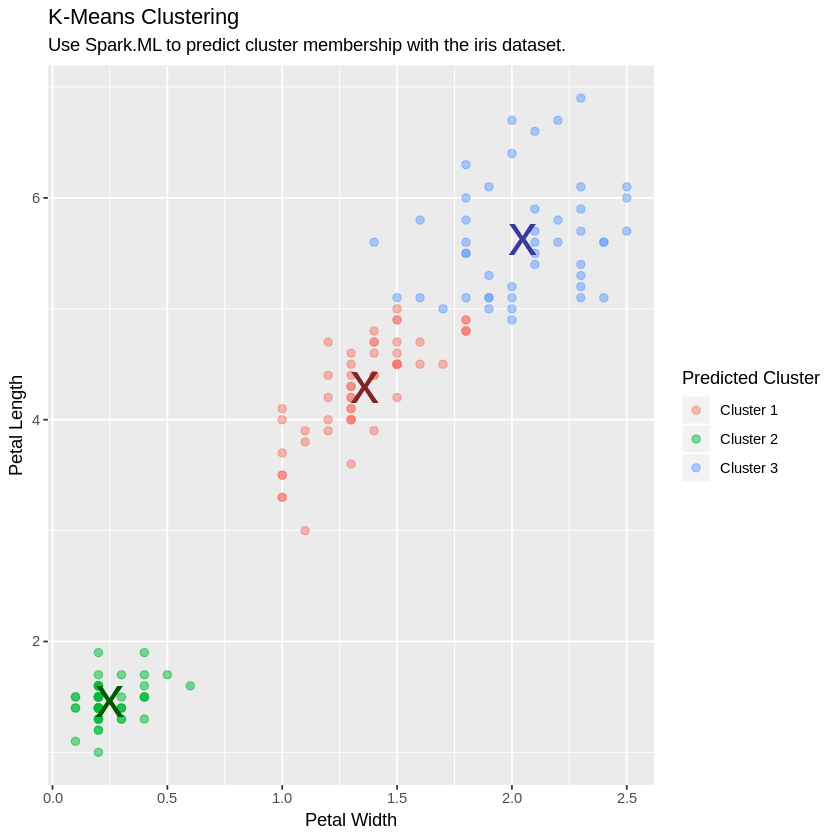

In [16]:
prediction  %>%
  ggplot(aes(Petal_Length, Petal_Width)) +
  geom_point(aes(Petal_Width, Petal_Length, col = factor(prediction + 1)),
             size = 2, alpha = 0.5) + 
  geom_point(data = fit2$centers, aes(Petal_Width, Petal_Length),
             col = scales::muted(c("red", "green", "blue")),
             pch = 'x', size = 12) +
  scale_color_discrete(name = "Predicted Cluster",
                       labels = paste("Cluster", 1:3)) +
  labs(
    x = "Petal Width",
    y = "Petal Length",
    title = "K-Means Clustering",
    subtitle = "Use Spark.ML to predict cluster membership with the iris dataset."
  )